## Group Project Report


In [1]:
library(ggplot2)
library(tidymodels)
library(tidyverse)
library(repr)
library(janitor)
library(GGally)
library(readr)
library(dplyr)
library(ISLR)
set.seed(1234)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tibble       3.2.1
✔ dplyr        1.1.3     ✔ tidyr        1.3.0
✔ infer        1.0.5     ✔ tune         1.1.2
✔ modeldata    1.2.0     ✔ workflows    1.1.3
✔ parsnip      1.1.1     ✔ workflowsets 1.0.1
✔ purrr        1.0.2     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Learn how to get started at https://www.tidymodels.org/start/

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ lubridate 1.9.2     ✔ stringr   1.5.0
── Conflicts ───────────────────

## Introduction

## Methods

We first read in the data and wrangle it.

In [19]:
url <- "https://raw.githubusercontent.com/slappyslop/dsci-100-002-033/main/data/HouseListings-Top45Cities-10292023-kaggle.csv"
download.file(url, "data/HouseListings-Top45Cities-10292023-kaggle.csv")
housing_raw <- read_csv("data/HouseListings-Top45Cities-10292023-kaggle.csv") |> clean_names()
housing_filter <- housing_raw |> filter(number_beds > 0 & number_baths > 0)
housing_clean <- housing_filter |> filter(!(city %in% c("Saskatoon", "Winnipeg", "Nanaimo", "Regina") & province == "Ontario"))

Rows: 35768 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): City, Address, Province
dbl (7): Price, Number_Beds, Number_Baths, Population, Latitude, Longitude, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Then we split the cleaned dataset into training set and testing set.

In [23]:
housing_split <- initial_split(housing_clean, prop = 0.75, strata = price)
training <- training(housing_split)
testing <- testing(housing_split)

### 1. Linear Regression

We first attempted to make a linear regression of price against one of the variables, we also made our own predictors which included the ratio of beds to bathrooms and sum of beds and bathrooms. In order to see the feasibility of this, we used a pairplot through the following code. Unfortunately, this code makes the kernel crash, and so this was done using RStudio on my (Shravan) local machine

In [24]:
training <- read_csv("data/training_csv")
testing <- read_csv("data/testing.csv")

New names:
• `` -> `...1`
Rows: 27944 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): city, province
dbl (5): ...1, price, number_beds, number_baths, median_family_income

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 6987 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): city, province
dbl (5): ...1, price, number_beds, number_baths, median_family_income

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
training <- training |> select(-...1, -city, -province)
testing <- testing |> select(-...1, -city, -province)

training_full <- training |> mutate(sum = number_beds + number_baths, ratio = number_beds/number_baths, logprice = log(price))
testing_full <- testing |> mutate(sum = number_beds + number_baths, ratio = number_beds/number_baths, logprice = log(price))

training


price,number_beds,number_baths,median_family_income
<dbl>,<dbl>,<dbl>,<dbl>
438000,2,1,97000
399900,2,1,97000
359000,1,1,97000
415000,2,1,97000
45000,3,5,97000
399000,1,1,97000
449000,1,1,97000
459900,3,2,97000
399900,1,1,97000


## MAKES THE KERNEL CRASH
price_pairplot <- training_full|> 
  ggpairs(
    lower = list(continuous = wrap('points', alpha = 0.4)),
    diag = list(continuous = "barDiag")
  ) +
  theme(text = element_text(size = 20))
"
price_pairplot

We discovered that the correlation coefficient was highest with `sum` and `number_baths` being the best linear predictors of price (0.483 and 0.437). The only other predictor that was non-colinear to `number_baths` was `median_family_income`, howeveer this had a coefficient of 0.065, and so we decided that for the linear regression the only predictor we would use was `number_baths`.

Additionally, we found (after speaking to the instructor during office hours) that we might have better luck predicting log(price) instead. We found that the correlation coefficient of `number_baths` (still the highest) with `logprice` was 0.546. So we took this for our linear regression.

In [6]:
lm_spec <- linear_reg() |> set_engine("lm") |> set_mode("regression")
lm_recipe <- recipe(logprice ~ number_baths, data = training_full)
lm_fit <-  workflow() |> add_recipe(lm_recipe) |> 
                    add_model(lm_spec) |> 
                    fit(data = training_full)
lm_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
 (Intercept)  number_baths  
     12.6853        0.3059  


In [7]:
lm_test_results <- lm_fit |>
  predict(testing_full) |>
  bind_cols(testing_full) |>
  metrics(truth = logprice, estimate = .pred)
lm_test_results

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.6347994
rsq,standard,0.2700901
mae,standard,0.4629664


This approach gives us an RMSE value of `0.6347994`.

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


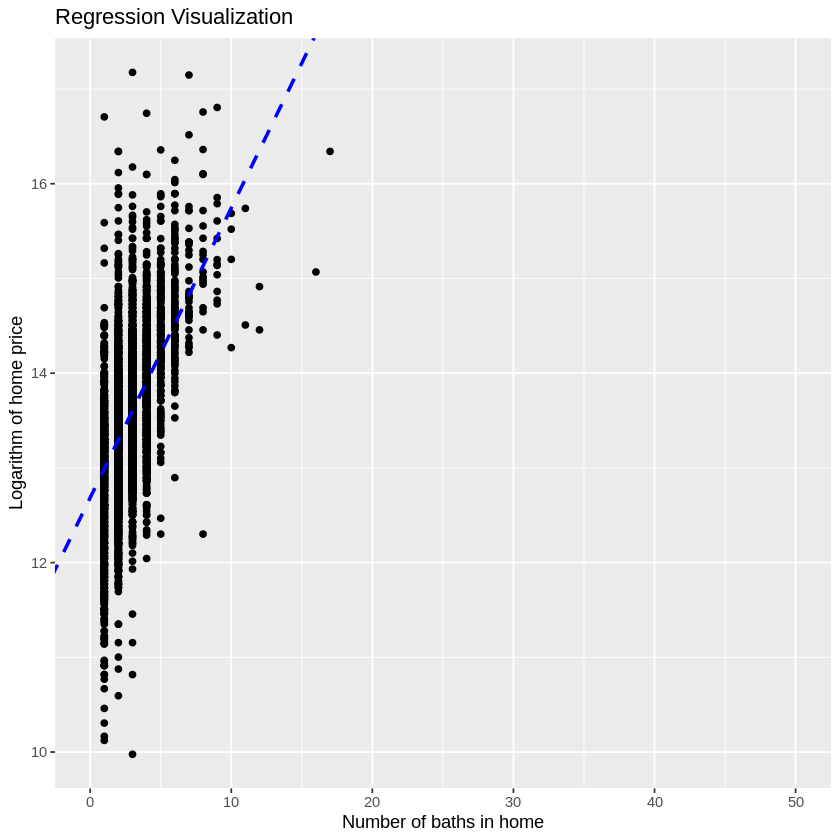

In [8]:
lm_plot <- ggplot(testing_full, aes(x = number_baths , y = logprice)) + 
            geom_point() +xlim(0, 50) + 
            geom_abline(intercept = 12.6853, slope =  0.3059 ,linetype = "dashed", color = "blue", size = 1) +
            labs(y = "Logarithm of home price", x = "Number of baths in home") +
            ggtitle("Regression Visualization")
lm_plot

### KNN  Regression

In [9]:
housing_recipe <- recipe(price ~ median_family_income + number_beds + number_baths, data = training_full) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

housing_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("regression")

housing_vfold <- vfold_cv(training_full, v = 5, strata = price)

housing_workflow <- workflow() |>
  add_recipe(housing_recipe) |>
  add_model(housing_spec)

housing_workflow

tuned_housing <- housing_workflow |>
  tune_grid(resamples = housing_vfold, grid = tibble(neighbors = seq(from = 1, to = 100, by = 10))) |>
  collect_metrics()|>
  filter(.metric == "rmse")

tuned_housing


══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,1006173.4,5,24771.90,Preprocessor1_Model01
11,rmse,standard,882676.6,5,24054.50,Preprocessor1_Model02
21,rmse,standard,855858.8,5,24989.09,Preprocessor1_Model03
31,rmse,standard,842449.8,5,25215.11,Preprocessor1_Model04
41,rmse,standard,832996.1,5,24694.76,Preprocessor1_Model05
51,rmse,standard,827822.2,5,25294.90,Preprocessor1_Model06
61,rmse,standard,824169.8,5,25654.59,Preprocessor1_Model07
71,rmse,standard,823502.1,5,25709.96,Preprocessor1_Model08
81,rmse,standard,823402.6,5,25874.52,Preprocessor1_Model09


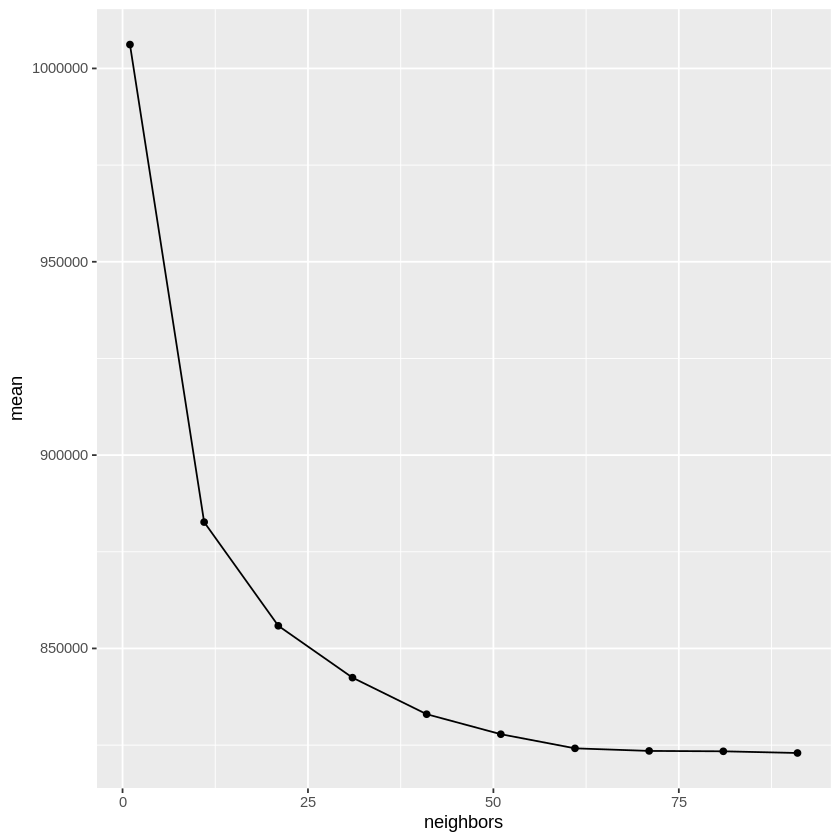

In [10]:
ggplot(tuned_housing, aes(x = neighbors, y = mean)) + geom_point() + geom_line()

We can see a very clear issue here. The way the kNN algorithm works is that it simply finds the city (`median_family_income`), `number_beds` and `number_baths` and takes the average of a number of similar listings based on our value of k. Of course, a 2 bedroom in Vancouver in a downtown skyscraper would have a very different price to a 2 bedroom in East Van. Our dataset doesn't account for this and this place a large factor in the large errors